# * Python Implementation

In [31]:
# Importing the Libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Initializing the dataframe

In [3]:
data=pd.read_csv('boston_house_rent.csv')

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Each record in the database describe a boston suburb or town

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Dataset analysis / stats using describe method

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Finding out the correlation between the feature

In [9]:
corr=data.corr()
corr.shape

(14, 14)

In [10]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Plooting the heatmap of correlation between feature

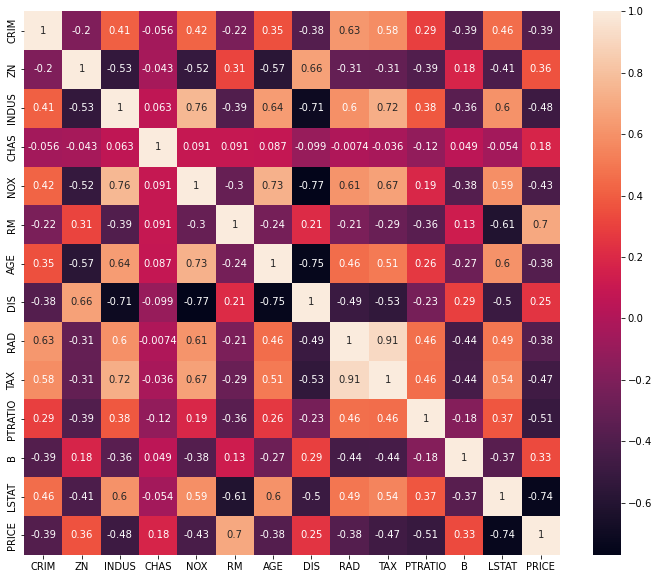

In [11]:
plt.figure(figsize=(12,10))

sns.heatmap(corr,annot=True)
plt.show()

# Seems RAD and TAX are correlated let's check with scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

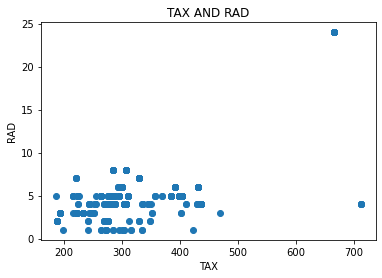

In [13]:
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX AND RAD')
plt.show

# * since we cannot confiorm with plot that there is a close relation so well not take risk and not deleting any feature

# dividing feature and label

In [16]:
x = data.drop(columns=['PRICE'],axis=1)

y = data['PRICE']

# Train test split (hold out method)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

# * Ada Boost Model Training

In [19]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
ada=AdaBoostRegressor()

In [21]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [22]:
y_pred = ada.predict(x_train)

In [23]:
accuracy = metrics.r2_score(y_train,y_pred)

print("R Square score",accuracy)

R Square score 0.9091492854695913


# * Since model has already seen the data so it is producing better score

In [25]:
# predicting Test data with the model 
y_test_pred = ada.predict(x_test)

# * Model Evalution 

In [26]:
accuracy = metrics.r2_score(y_test,y_test_pred)

print("R Squaree score:",accuracy)

R Squaree score: 0.8241274703808962


# * Hyperparameter Tuning Using RandomizedSearchCv

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions = params)

rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_

ada = AdaBoostRegressor(learning_rate=0.26,n_estimators=70)

ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)

print("*** accuracy post tuning ***")
print(metrics.r2_score(y_test,y_pred))

*** accuracy post tuning ***
0.8228145841936607
